In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [12]:
PrPV = 0.95     # Pr(P|V)
PrPM = 0.01     # Pr(P|M)
PrV = 0.001     # Pr(V)
PrP = PrPV * PrV + PrPM * (1-PrV)   # Pr(P)
PrVP = PrPV * PrV / PrP             # Pr(V|P)
print(f"{PrVP:.8f}")

0.08683729


The posterior is typically impossible to directly compute, so we need to approximate it somehow. The standard approach is MCMC.

Statistical power of a test = probability of a test returning positive when the hypothesis is actually true

In [35]:
p_grid = np.linspace(0, 1, 1_000)
prior = np.ones(1_000)
# evaluate the likelihood of observing 6/9 under every point in parameter space
likelihood = ss.binom.pmf(6, 9, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)

(array([307.,  54.,  39.,  30.,  27.,  24.,  21.,  21.,  19.,  18.,  17.,
         18.,  17.,  15.,  16.,  16.,  17.,  15.,  16.,  16.,  17.,  16.,
         18.,  18.,  20.,  22.,  22.,  28.,  35.,  81.]),
 array([0.00000000e+00, 9.11341662e-05, 1.82268332e-04, 2.73402499e-04,
        3.64536665e-04, 4.55670831e-04, 5.46804997e-04, 6.37939164e-04,
        7.29073330e-04, 8.20207496e-04, 9.11341662e-04, 1.00247583e-03,
        1.09360999e-03, 1.18474416e-03, 1.27587833e-03, 1.36701249e-03,
        1.45814666e-03, 1.54928083e-03, 1.64041499e-03, 1.73154916e-03,
        1.82268332e-03, 1.91381749e-03, 2.00495166e-03, 2.09608582e-03,
        2.18721999e-03, 2.27835416e-03, 2.36948832e-03, 2.46062249e-03,
        2.55175665e-03, 2.64289082e-03, 2.73402499e-03]),
 <BarContainer object of 30 artists>)

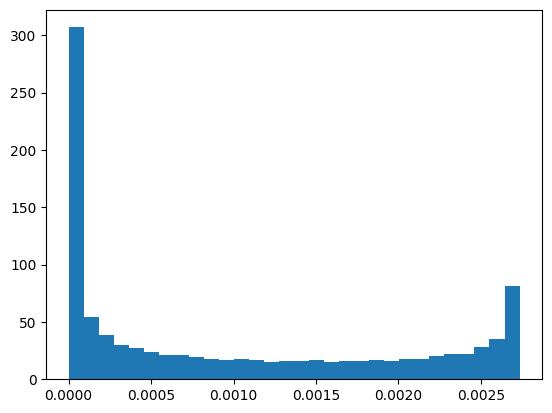

In [37]:
plt.hist(posterior, bins=30)

Let's draw samples from this posterior.

In [44]:
samples = np.random.choice(a=p_grid, p=posterior, size=10_000, replace=True)

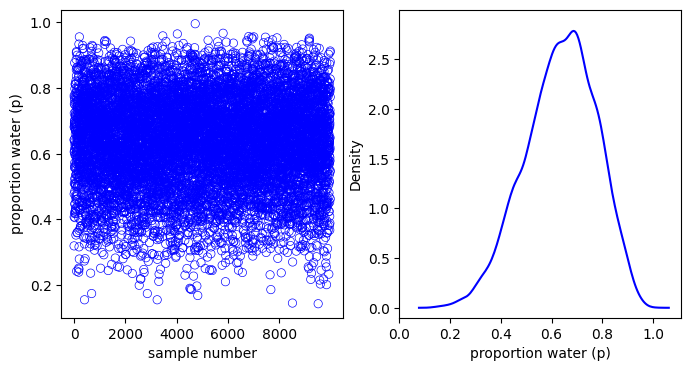

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
# ax[0].scatter(range(10_000), samples, marker='o')
sns.scatterplot(x=range(10_000), y=samples, marker='o', edgecolor='blue', color="none", ax=ax[0])
sns.kdeplot(samples, ax=ax[1], color='blue')
ax[0].set(ylabel='proportion water (p)', xlabel='sample number', xticks=np.arange(0,10_000, 2_000))
ax[1].set(ylabel='Density', xlabel='proportion water (p)', ylim=[-0.1, 3.0], yticks=np.arange(0,3,0.5), xticks=np.arange(0, 1.2, 0.2))
plt.show()

What is the posterior probability that $p < 0.5$? We can compute this from the samples:

In [74]:
sum(samples < 0.5) / len(samples)

0.1715